In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import numpy as np
import scipy.stats as stats
from itertools import product

# Question 1

## Part A

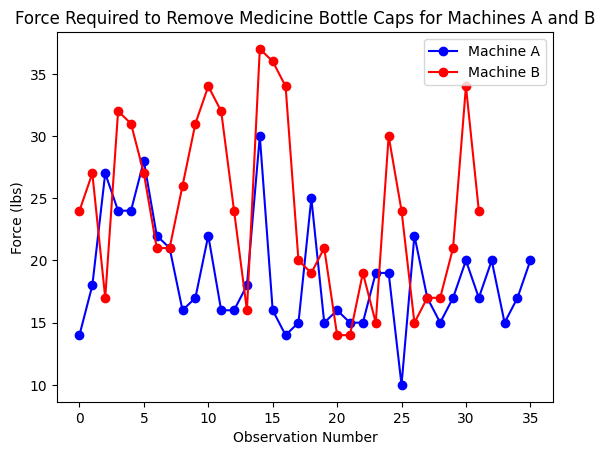

In [3]:
df = pd.read_csv('MedicineCap.csv')
machineA_data = df['MachineA']
machineB_data = df['MachineB']
plt.plot(machineA_data, marker='o', linestyle='-', color='b', label='Machine A')
plt.plot(machineB_data, marker='o', linestyle='-', color='r', label='Machine B')
plt.title('Force Required to Remove Medicine Bottle Caps for Machines A and B')
plt.xlabel('Observation Number')
plt.ylabel('Force (lbs)')
plt.legend()
plt.show()

## Part B

In [4]:
machine_A = [x for x in df['MachineA'] if str(x) != 'nan']
machine_B = [x for x in df['MachineB'] if str(x) != 'nan']

mean_A_manual = sum(machine_A)/len(machine_A)
variance_A_manual = sum((x - mean_A_manual) ** 2 for x in machine_A) / (len(machine_A) - 1)
std_dev_A_manual = np.sqrt(variance_A_manual)
mean_B_manual = sum(machine_B)/len(machine_B)
variance_B_manual = sum((x - mean_B_manual) ** 2 for x in machine_B) / (len(machine_B) - 1)
std_dev_B_manual = np.sqrt(variance_B_manual)

mean_A_builtin = statistics.mean(machine_A)
variance_A_builtin = statistics.variance(machine_A)
std_dev_A_builtin = statistics.stdev(machine_A)
mean_B_builtin = statistics.mean(machine_B)
variance_B_builtin = statistics.variance(machine_B)
std_dev_B_builtin = statistics.stdev(machine_B)

In [5]:
print('MACHINE A')
print(f"> Manual\nMean: {mean_A_manual}\nVariance: {variance_A_manual}\nStd Dev: {std_dev_A_manual}")
print(f"> Built-in Functions\nMean: {mean_A_builtin}\nVariance: {variance_A_builtin}\nStd Dev: {std_dev_A_builtin}\n")
print('MACHINE B')
print(f"> Manual\nMean: {mean_B_manual}\nVariance: {variance_B_manual}\nStd Dev: {std_dev_B_manual}")
print(f"> Built-in Functions\nMean: {mean_B_builtin}\nVariance: {variance_B_builtin}\nStd Dev: {std_dev_B_builtin}")

MACHINE A
> Manual
Mean: 18.666666666666668
Variance: 19.31428571428572
Std Dev: 4.394802124588287
> Built-in Functions
Mean: 18.666666666666668
Variance: 19.314285714285713
Std Dev: 4.394802124588286

MACHINE B
> Manual
Mean: 24.1875
Variance: 50.67338709677419
Std Dev: 7.1185242218295635
> Built-in Functions
Mean: 24.1875
Variance: 50.67338709677419
Std Dev: 7.1185242218295635


## Part C

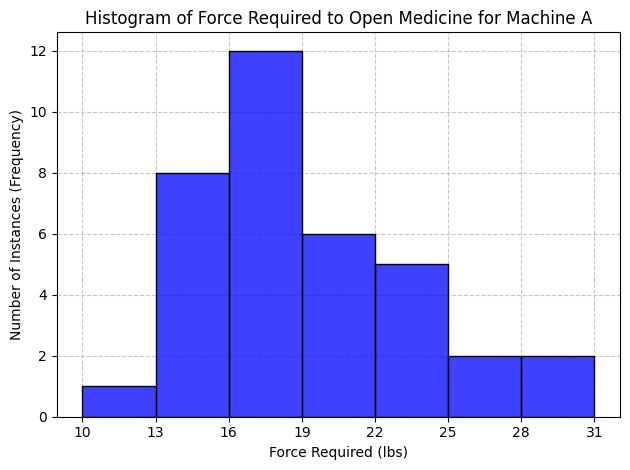

In [6]:
fig, ax = plt.subplots()
bin_edges = np.arange(min(machine_A), min(machine_A) + 3 * 7 + 1, 3)
sns.histplot(machine_A, bins=bin_edges, color='blue', edgecolor='black', ax=ax)
ax.set_xticks(np.arange(min(machine_A), max(machine_A) + 3, 3))
ax.set_xlabel('Force Required (lbs)', fontsize=10)
ax.set_ylabel('Number of Instances (Frequency)', fontsize=10)
ax.set_title('Histogram of Force Required to Open Medicine for Machine A', fontsize=12)
ax.grid(True, linestyle='--', alpha=0.7, zorder=0)
ax.set_axisbelow(True)
plt.tight_layout()
plt.show()

## Part D

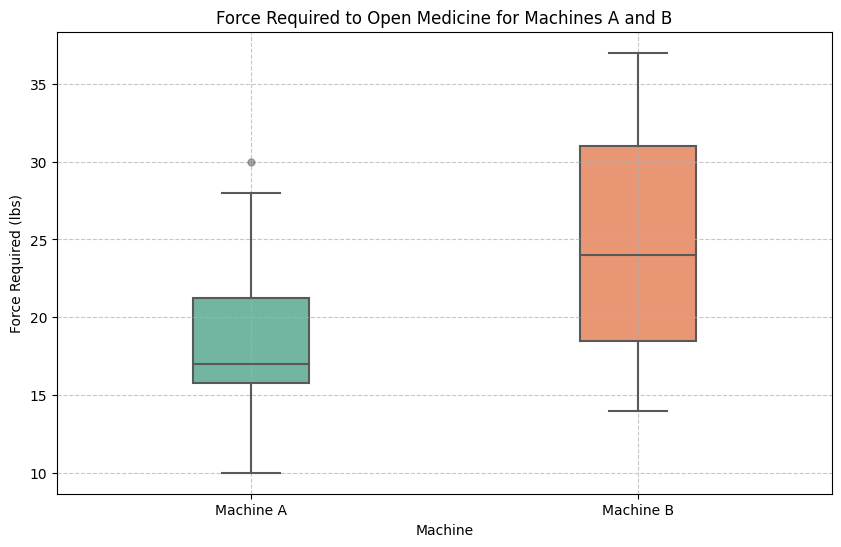

In [7]:
data = [machine_A, machine_B]
labels = ['Machine A', 'Machine B']
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, width=0.3, palette='Set2', flierprops=dict(marker='o', color='red', alpha=0.5))
plt.xticks(ticks=[0, 1], labels=labels)
plt.ylabel('Force Required (lbs)')
plt.xlabel('Machine')
plt.title('Force Required to Open Medicine for Machines A and B')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

## Part E

In [8]:
min_A = np.min(machine_A)
q1_A = np.percentile(machine_A, 25, method='linear')
median_A = np.percentile(machine_A, 50, method='linear')
q3_A = np.percentile(machine_A, 75, method='linear')
max_A = np.max(machine_A)

min_B = np.min(machine_B)
q1_B = np.percentile(machine_B, 25, method='linear')
median_B = np.percentile(machine_B, 50, method='linear')
q3_B = np.percentile(machine_B, 75, method='linear')
max_B = np.max(machine_B)

IQR_A = q3_A - q1_A
IQR_B = q3_B - q1_B
lb_A = q1_A - 1.5*IQR_A
ub_A = q3_A + 1.5*IQR_A
lb_B = q1_B - 1.5*IQR_B
ub_B = q3_B + 1.5*IQR_B
outliersA = [x for x in machine_A if x < lb_A or x > ub_A]
outliersB = [x for x in machine_B if x < lb_B or x > ub_B]

data = {
    'Statistic': ['Min', 'Q1', 'Median', 'Q3', 'Max', 'Outliers'],
    'Machine A': [min_A, q1_A, median_A, q3_A, max_A, outliersA],
    'Machine B': [min_B, q1_B, median_B, q3_B, max_B, outliersB]
}

df = pd.DataFrame(data)
df

,Statistic,Machine A,Machine B
0,Min,10,14.0
1,Q1,15.75,18.5
2,Median,17.0,24.0
3,Q3,21.25,31.0
4,Max,30,37.0
5,Outliers,[30],[]


## Part F

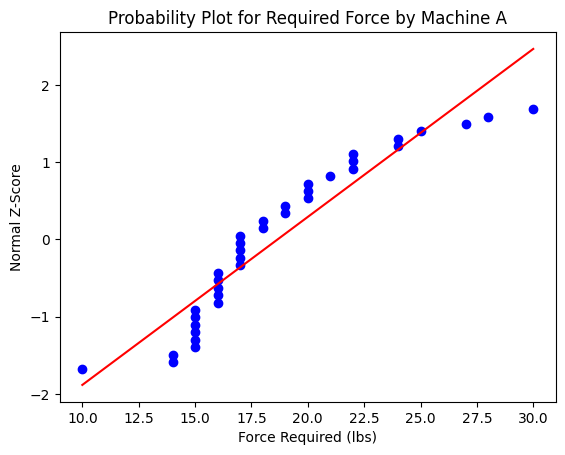

In [9]:
x = np.sort(machine_A)
z_scores = stats.zscore(range(len(x)))
slope, intercept, r_value, p_value, std_err = stats.linregress(x, z_scores)

plt.scatter(x, z_scores, color='blue')
plt.plot(x, slope * x + intercept, color='red')
plt.xlabel('Force Required (lbs)')
plt.ylabel('Normal Z-Score')
plt.title('Probability Plot for Required Force by Machine A')
plt.show()

# Question 2

In [10]:
sample_space = list(product(['F', 'D'], repeat=4))

print(f"Sample space ({len(sample_space)} outcomes):")
for outcome in sample_space:
    print(outcome)

outcomes_two_defective = [outcome for outcome in sample_space if outcome.count('D') == 2]
count_two_defective = len(outcomes_two_defective)
print(f"\nNumber of outcomes with exactly two defective nozzles: {count_two_defective}")
print("Outcomes with exactly two defective nozzles:")
for outcome in outcomes_two_defective:
    print(outcome)

Sample space (16 outcomes):
('F', 'F', 'F', 'F')
('F', 'F', 'F', 'D')
('F', 'F', 'D', 'F')
('F', 'F', 'D', 'D')
('F', 'D', 'F', 'F')
('F', 'D', 'F', 'D')
('F', 'D', 'D', 'F')
('F', 'D', 'D', 'D')
('D', 'F', 'F', 'F')
('D', 'F', 'F', 'D')
('D', 'F', 'D', 'F')
('D', 'F', 'D', 'D')
('D', 'D', 'F', 'F')
('D', 'D', 'F', 'D')
('D', 'D', 'D', 'F')
('D', 'D', 'D', 'D')

Number of outcomes with exactly two defective nozzles: 6
Outcomes with exactly two defective nozzles:
('F', 'F', 'D', 'D')
('F', 'D', 'F', 'D')
('F', 'D', 'D', 'F')
('D', 'F', 'F', 'D')
('D', 'F', 'D', 'F')
('D', 'D', 'F', 'F')
